# Gaode

In [1]:
import numpy as np
from scipy.integrate import odeint

## Dummy tests (odeint)

In [2]:
def dy_model(y,t,):
    dy = np.zeros(3)
    dy[0] =  y[1]
    dy[1] =  -0.05*y[0]
    dy[2] =  -0.001*y[2]*np.exp(y[0])
    return dy
y0_odeint = np.array([5,0,5,])
t_dom_odeint = np.linspace(0, 100, 501)
y_res_odeint = odeint(dy_model, y0_odeint, t_dom_odeint)

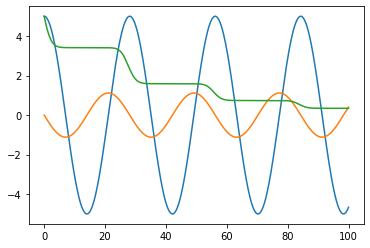

In [3]:
import matplotlib.pyplot as plt
plt.plot(t_dom_odeint, y_res_odeint[:, 0])
plt.plot(t_dom_odeint, y_res_odeint[:, 1])
plt.plot(t_dom_odeint, y_res_odeint[:, 2])


## Function for ODE Solving

이 부 분 이 핵 심! 나 중 에 아 래  코 드  복 사 해  갈 것!

In [4]:
def gaode(dy_fun, y0, t, args= None):
#    if np.isscalar(t):
#        t_domain = np.linspace(0,t, 10001, dtype=np.float64)
#    else:
#        t_domain = np.array(t[:], dtype = np.float64)
    t_domain = np.array(t[:], dtype = np.float64)
    y_res = []
    dt_arr = t_domain[1:] - t_domain[:-1]

    N = len(y0)
    tt_prev = t_domain[0]
    y_tmp = np.array(y0, dtype = np.float64)
    y_res.append(y_tmp)
    if args == None:
        for tt, dtt in zip(t_domain[:-1], dt_arr):
            dy_tmp = dy_fun(y_tmp, tt)
            y_tmp_new = y_tmp + dy_tmp*dtt
            tt_prev = tt
            y_res.append(y_tmp_new)
            y_tmp = y_tmp_new
#            if tt%10 == 1:
#                print(y_tmp_new, y_tmp)
        y_res_arr = np.array(y_res, dtype = np.float64)
    else:
        for tt, dtt in zip(t_domain[1:], dt_arr):
            dy_tmp = dy_fun(y_tmp, tt, *args)
            y_tmp_new = y_tmp + dy_tmp*dtt
            tt_prev = tt
            y_res.append(y_tmp_new)
            y_tmp = y_tmp_new
        y_res_arr = np.array(y_res, dtype=object)
    
    return y_res_arr
#    a = dy_fun(y0, t, *args)
#    return a

def odetest(y0, t, arg1, arg2):
    dy = -y0*arg1*arg2
    return dy

args_test = [0.1, 0.3]
y0_test = np.array([3,3,3,3])
t_test = np.linspace(0, 10,)
res_gaode = gaode(odetest, y0_test, t_test, args_test)


### TEST ODEINT

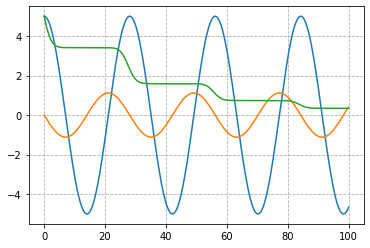

In [9]:
def dy_model(y,t,):
    dy = np.zeros(3)
    dy[0] =  y[1]
    dy[1] =  -0.05*y[0]
    dy[2] =  -0.001*y[2]*np.exp(y[0])
    return dy
y0_odeint = np.array([5,0,5,])
t_dom_odeint = np.linspace(0, 100, 501)
y_res_odeint = odeint(dy_model, y0_odeint, t_dom_odeint)

plt.plot(t_dom_odeint, y_res_odeint[:, 0])
plt.plot(t_dom_odeint, y_res_odeint[:, 1])
plt.plot(t_dom_odeint, y_res_odeint[:, 2])
plt.grid(linestyle = '--')

### TEST GAODE

In [6]:
y0_odeint = y_res_odeint[-1,:]
ytmp = y0_odeint
dytmp = dy_model(y0_odeint, 0)
print(dytmp)
# Iter 1
dytmp = dy_model(y0_odeint, 0)
ytmp_new = ytmp + dytmp*(t_dom_odeint[1] - t_dom_odeint[0])
print(ytmp_new)
ytmp = ytmp_new

# Iter 2
dytmp = dy_model(ytmp, t_dom_odeint[1])
ytmp_new = ytmp + dytmp*(t_dom_odeint[2] - t_dom_odeint[1])
print(ytmp_new)
ytmp = ytmp_new

# Iter 3
dytmp = dy_model(ytmp, t_dom_odeint[2])
ytmp_new = ytmp + dytmp*(t_dom_odeint[3] - t_dom_odeint[2])
print(ytmp_new)
ytmp = ytmp_new

# Iter 3
dytmp = dy_model(ytmp, t_dom_odeint[2])
ytmp_new = ytmp + dytmp*(t_dom_odeint[3] - t_dom_odeint[2])
print(ytmp_new)
ytmp = ytmp_new

dytmp = dy_model(ytmp, t_dom_odeint[3])
ytmp_new = ytmp + dytmp*(t_dom_odeint[4] - t_dom_odeint[3])
print(ytmp_new)
ytmp = ytmp_new

dytmp = dy_model(ytmp, t_dom_odeint[4])
ytmp_new = ytmp + dytmp*(t_dom_odeint[5] - t_dom_odeint[4])
print(ytmp_new)
ytmp = ytmp_new

dytmp = dy_model(ytmp, t_dom_odeint[5])
ytmp_new = ytmp + dytmp*(t_dom_odeint[6] - t_dom_odeint[5])
print(ytmp_new)
ytmp = ytmp_new


[ 4.03809649e-01  2.33124214e-01 -3.24049278e-06]
[-4.58172236  0.45043449  0.34316377]
[-4.49163546  0.49625172  0.34316307]
[-4.39238512  0.54116807  0.3431623 ]
[-4.2841515   0.58509192  0.34316145]
[-4.16713312  0.62793344  0.34316051]
[-4.04154643  0.66960477  0.34315944]
[-3.90762548  0.71002023  0.34315824]


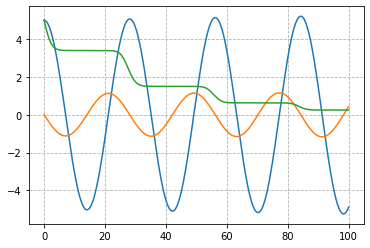

In [7]:
def dy_model(y,t,):
    dy = np.zeros(3)
    dy[0] =  y[1]
    dy[1] =  -0.05*y[0]
    dy[2] =  -0.001*y[2]*np.exp(y[0])
    return dy
y0_odeint = np.array([5,0,5,])
t_dom_odeint = np.linspace(0, 100, 5001)
#t_dom_odeint = 100
y_res_odeint = gaode(dy_model, y0_odeint, t_dom_odeint)

plt.plot(t_dom_odeint, y_res_odeint[:, 0])
plt.plot(t_dom_odeint, y_res_odeint[:, 1])
plt.plot(t_dom_odeint, y_res_odeint[:, 2])
plt.grid(linestyle = '--')

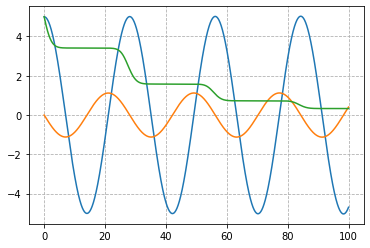

In [10]:
def dy_model(y,t,):
    dy = np.zeros(3)
    dy[0] =  y[1]
    dy[1] =  -0.05*y[0]
    dy[2] =  -0.001*y[2]*np.exp(y[0])
    return dy
y0_odeint = np.array([5,0,5,])
t_dom_odeint = np.linspace(0, 100, 40001)
#t_dom_odeint = 100
y_res_odeint = gaode(dy_model, y0_odeint, t_dom_odeint)

plt.plot(t_dom_odeint, y_res_odeint[:, 0])
plt.plot(t_dom_odeint, y_res_odeint[:, 1])
plt.plot(t_dom_odeint, y_res_odeint[:, 2])
plt.grid(linestyle = '--')

# Advanced Function

In [18]:
def AutoDomain(dy_fun, y0, t, args= None):
    t_start = t[0]
    t_end = t[-1] 
    n_dom_list = [int(1E4), int(5E4), int(10E4), int(20E4), int(100E4)]
    val1_list = []
    val2_list = []
    tval1_list = []
    tval2_list = []
    for nn in n_dom_list:
        t_domain = np.linspace(t_start, t_end, nn+1)
        y_res_tmp = gaode(dy_fun, y0, t_domain, args = args)
        #plt.figure()
        #plt.plot(t_domain, y_res_tmp,)
        val1_tmp = y_res_tmp[-int(nn/1E3)-1, :]
        val2_tmp = y_res_tmp[-int(2*nn/1E3)-1, :]
        tval1_tmp = t_domain[-int(nn/1E3)-1]
        tval2_tmp = t_domain[-int(2*nn/1E3)-1]
        for vv in val1_tmp:
            if vv <= 0:
                vv = 0.0001
        for vv in val2_tmp:
            if vv <= 0:
                vv = 0.0001
        if nn > 1.1E4:
            err1_tmp = (val1_tmp - val1_list[-1])/val1_tmp
            err2_tmp = (val2_tmp - val2_list[-1])/val2_tmp
        else:
            err1_tmp = 1
            err2_tmp = 1
        if np.mean(err1_tmp) < 5E-3:
            if np.mean(err1_tmp) < 5E-3:
                print(nn)
                return y_res_tmp, t_domain
        val1_list.append(val1_tmp)
        val2_list.append(val2_tmp)
        tval1_list.append(tval1_tmp)
        tval2_list.append(tval2_tmp)
        
    return val1_list, val2_list, tval1_list, tval2_list

y0_odeint = np.array([5,0,5,])
t_dom_odeint = np.linspace(0, 100, 401)
res_Auto = AutoDomain(dy_model, y0_odeint, t_dom_odeint)

    

100000


In [19]:
print(np.array(res_Auto[0]))
print(np.array(res_Auto[1]))
#print(res_Auto[2])
#print(res_Auto[3])

[[ 5.00000000e+00  0.00000000e+00  5.00000000e+00]
 [ 5.00000000e+00 -2.50000000e-04  4.99925793e+00]
 [ 4.99999975e+00 -5.00000000e-04  4.99851598e+00]
 ...
 [-4.67496425e+00  4.04352556e-01  3.38138539e-01]
 [-4.67455990e+00  4.04586304e-01  3.38138536e-01]
 [-4.67415531e+00  4.04820032e-01  3.38138533e-01]]
[0.0000e+00 1.0000e-03 2.0000e-03 ... 9.9998e+01 9.9999e+01 1.0000e+02]
